In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from mlxtend.plotting import plot_confusion_matrix

In [2]:
df=pd.read_csv("train.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
df.shape

(891, 12)

In [4]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df=df.drop(columns='Cabin',axis=1)
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df['Embarked'].mode()[0]

'S'

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [13]:
val=df['Survived'].value_counts()
val

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='count'>

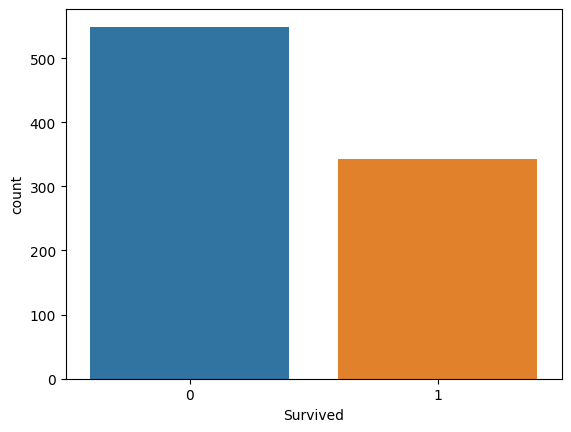

In [14]:
sns.countplot(x='Survived',data=df)

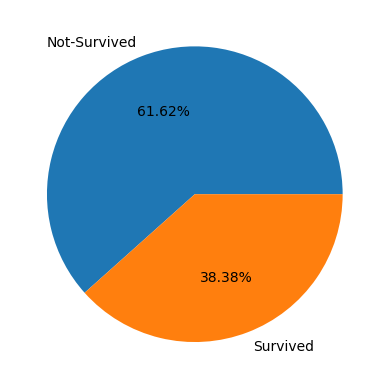

In [15]:
plt.pie(val,labels=['Not-Survived','Survived'],autopct='%0.02f%%')
plt.show()

In [16]:
val=df['Sex'].value_counts()
val

male      577
female    314
Name: Sex, dtype: int64

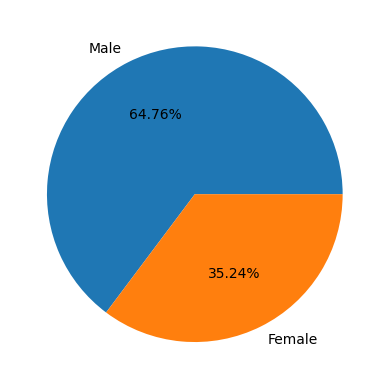

In [17]:
plt.pie(val,labels=['Male','Female'],autopct='%0.02f%%')
plt.show()

<AxesSubplot: xlabel='Sex', ylabel='count'>

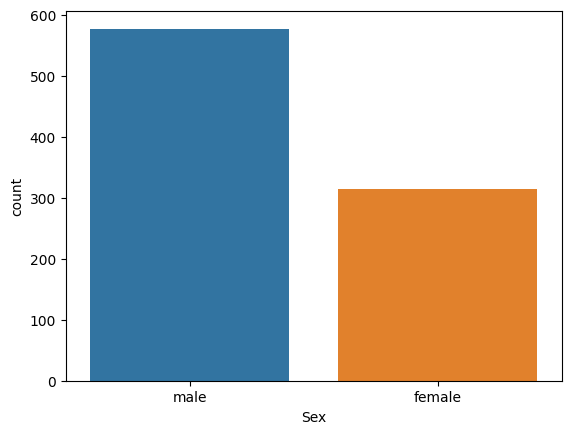

In [18]:
sns.countplot(x='Sex',data=df)

<AxesSubplot: xlabel='Sex', ylabel='count'>

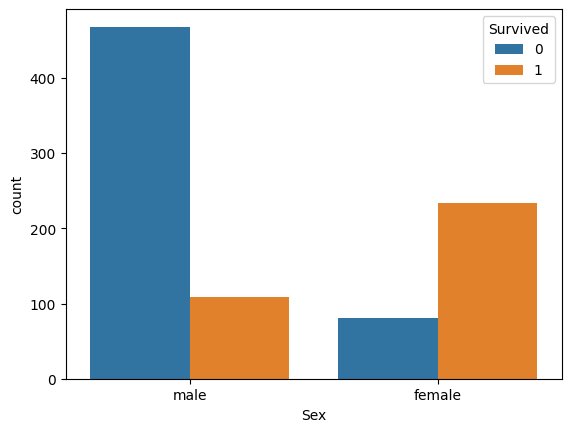

In [19]:
sns.countplot(x='Sex',hue='Survived',data=df)

In [20]:
val=df['Pclass'].value_counts()
val

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='count'>

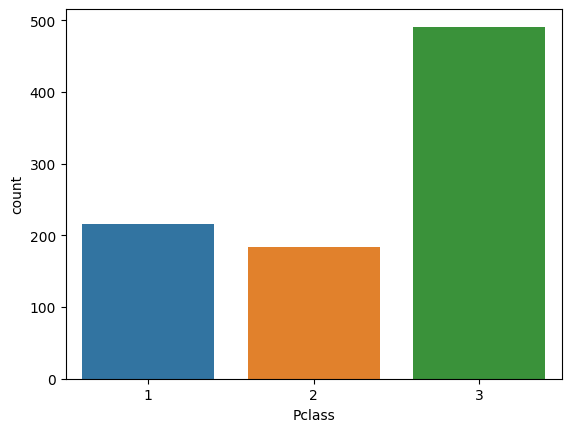

In [21]:
sns.countplot(x='Pclass',data=df)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

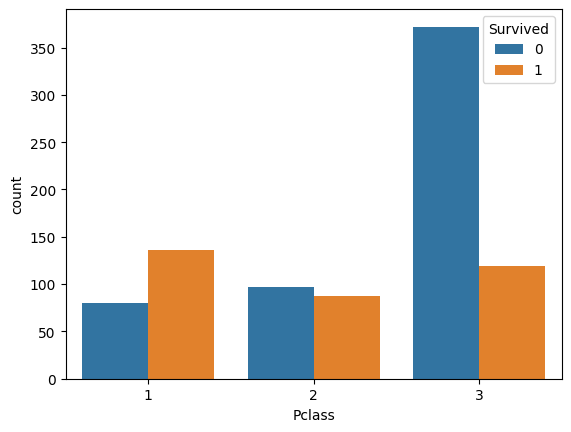

In [22]:
sns.countplot(x='Pclass',hue='Survived',data=df)

C:\Users\HP\AppData\Local\Temp\ipykernel_15388\3690769723.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, layout=(2,4), alpha=1);


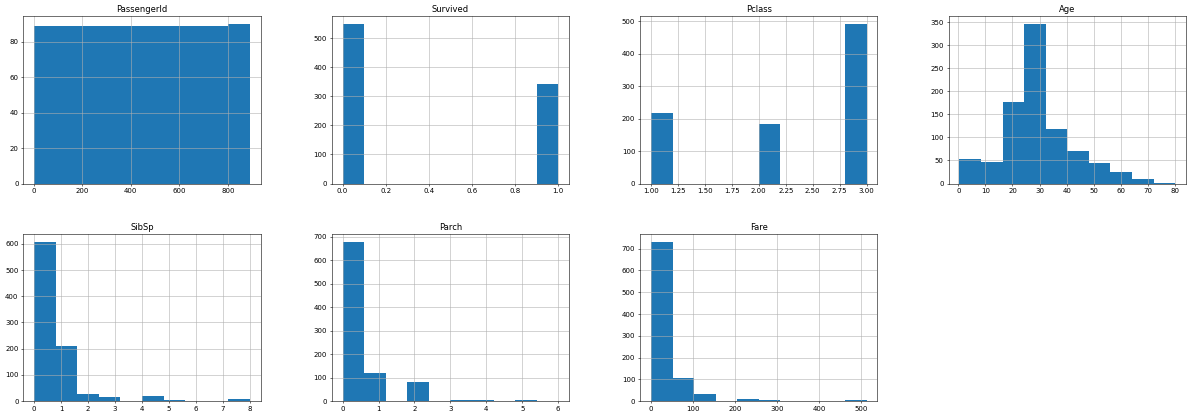

In [23]:
fig, ax = plt.subplots(figsize=(30,10), dpi=50);
df.hist(ax=ax, layout=(2,4), alpha=1);

In [24]:
df['Sex'].replace({'male':0,'female':1},inplace=True)
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry    0  35.000000      0   
..                                                 ...  ...        ...    ...   
886                              Montvila, Rev. Juozas    0  27.000000      0   
887                       Graham, Miss. Margaret Edith    1  19.000000      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1  29.699118      1   
889                              Behr, Mr. Karl Howell    0  26.000000      0   
890                                Dooley, Mr. Patrick    0  32.000000      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [25]:
df['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry    0  35.000000      0   
..                                                 ...  ...        ...    ...   
886                              Montvila, Rev. Juozas    0  27.000000      0   
887                       Graham, Miss. Margaret Edith    1  19.000000      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1  29.699118      1   
889                              Behr, Mr. Karl Howell    0  26.000000      0   
890                                Dooley, Mr. Patrick    0  32.000000      0   

     Parch            Ticket     Fare  Embarked  
0        0         A/5 21171   7.2500         0  
1        0          PC 17599  71.2833         1  
2        0  STON/O2. 3101282   7.9250         0  
3        0            113803  53.1000         0  
4        0            373450   8.0500         0  
..     ...               ...      ...       ...  
886      0            211536  13.0000         0  
887      0            112053  30.0000         0  
888      2        W./C. 6607  23.4500         0  
889      0            111369  30.0000         1  
890      0            370376   7.7500         2  

[891 rows x 11 columns]

In [26]:
df.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.699118   
std     257.353842    0.486592    0.836071    0.477990   13.002015   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   29.699118   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.361392  
std      1.102743    0.806057   49.693429    0.635673  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    0.000000  
50%      0.000000    0.000000   14.454200    0.000000  
75%      1.000000    0.000000   31.000000    1.000000  
max      8.000000    6.000000  512.329200    2.000000

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


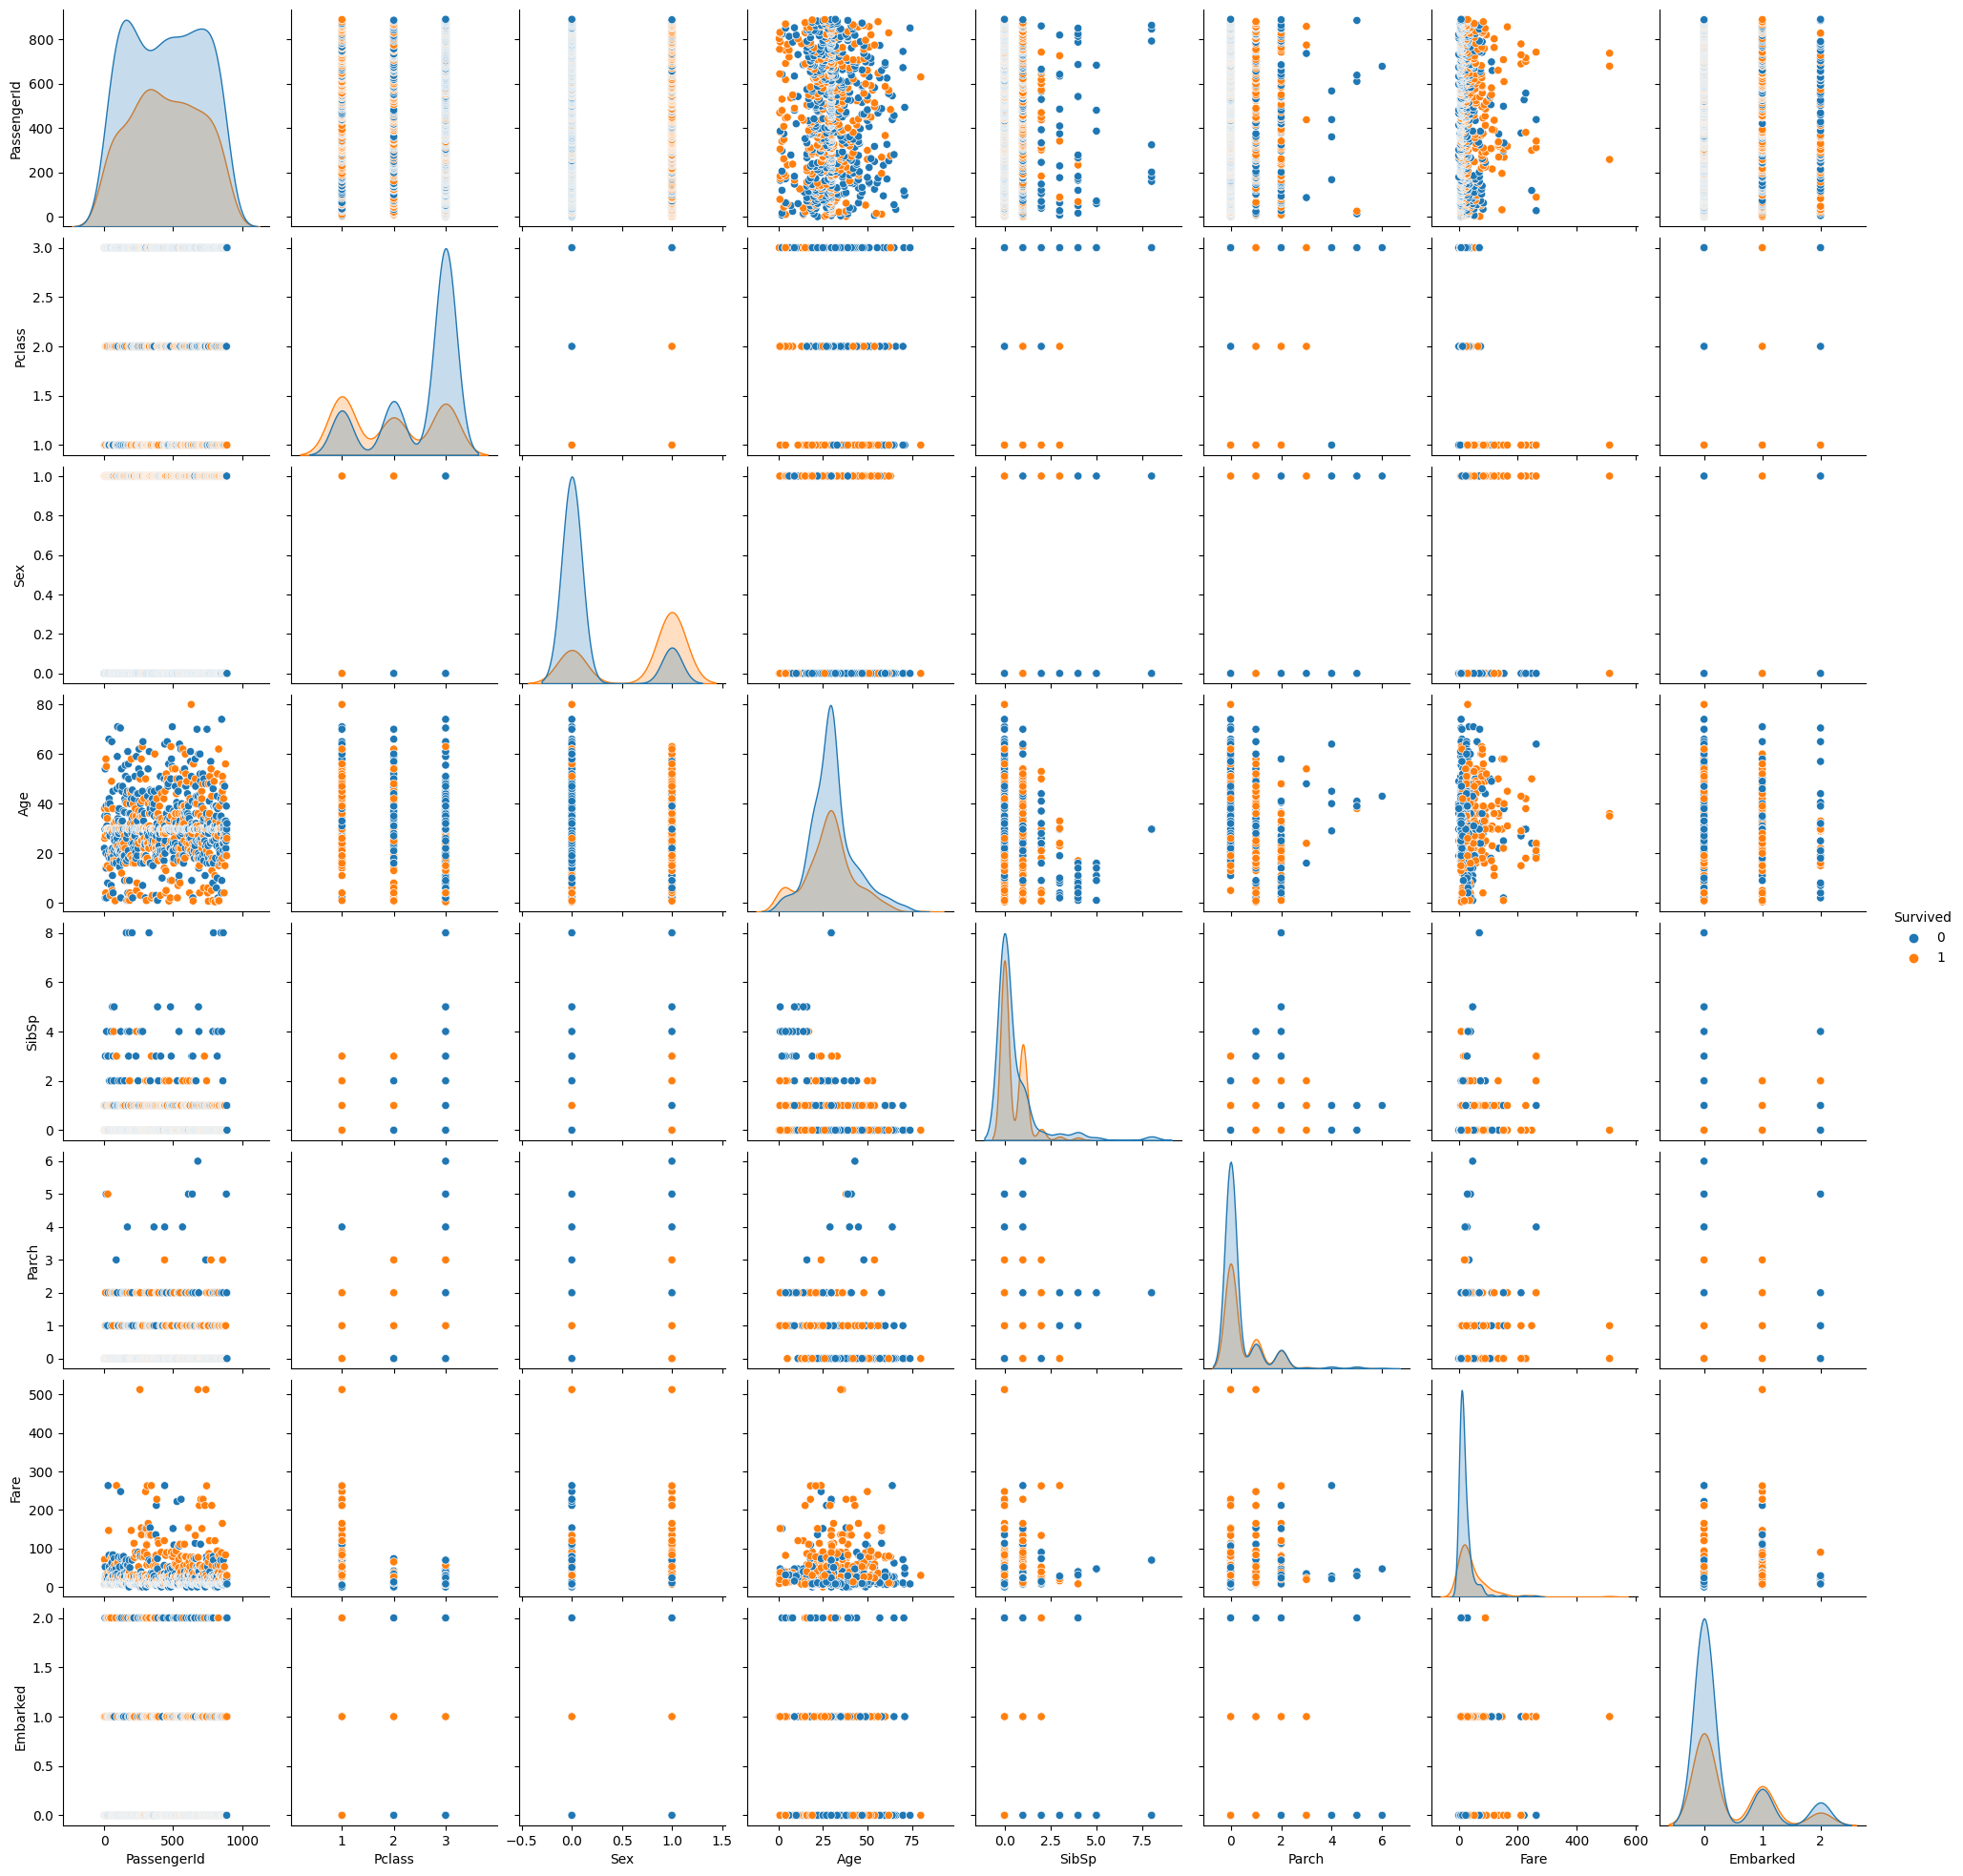

In [28]:
sns.pairplot(df,hue='Survived')

In [29]:
import plotly.express as px
fig = px.imshow(df.corr(),text_auto=True,aspect="auto")
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15388\1904233665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.corr(),text_auto=True,aspect="auto")


In [30]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=df['Survived']

In [31]:
X

Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]

In [32]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print("Shape of X :",X.shape)
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)

Shape of X : (891, 7)
Shape of X_train : (712, 7)
Shape of X_test : (179, 7)


In [35]:
print("Shape of Y :",Y.shape)
print("Shape of Y_train :",Y_train.shape)
print("Shape of Y_test :",Y_test.shape)

Shape of Y : (891,)
Shape of Y_train : (712,)
Shape of Y_test : (179,)


In [36]:
#LOGISTIC REGRESSION
model=LogisticRegression()

In [37]:
model.fit(X_train,Y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [38]:
Y_train_prediction=model.predict(X_train)
print(Y_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [39]:
train_data_accuracy=accuracy_score(Y_train,Y_train_prediction)
print("Accuracy of Train Data :: ",train_data_accuracy)

Accuracy of Train Data ::  0.8075842696629213


In [40]:
Y_test_prediction=model.predict(X_test)
print(Y_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [41]:
test_data_accuracy=accuracy_score(Y_test,Y_test_prediction)
print("Accuracy of Test Data :: ",test_data_accuracy)

Accuracy of Test Data ::  0.7821229050279329


In [42]:
mat=confusion_matrix(Y_test,Y_test_prediction)
mat

array([[91,  9],
       [30, 49]], dtype=int64)

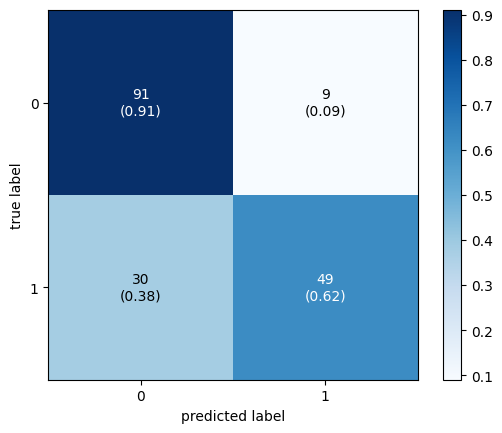

In [43]:
plot_confusion_matrix(mat,show_normed=True, colorbar=True, show_absolute=True)   
plt.show()

In [44]:
precision=precision_score(Y_test,Y_test_prediction)
recall=recall_score(Y_test,Y_test_prediction)
f1_sc=f1_score(Y_test,Y_test_prediction)

In [45]:
print("Precision :: ",precision)
print(" Recall   :: ",recall)
print("f1_score  :: ",f1_sc)

Precision ::  0.8448275862068966
 Recall   ::  0.620253164556962
f1_score  ::  0.7153284671532847


In [46]:
#RANDOM FOREST
rf_classifier=RandomForestClassifier(n_estimators=1000,random_state=42)

In [47]:
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [48]:
Y_pred=rf_classifier.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy of Test Data :: ",accuracy)

Accuracy of Test Data ::  0.8100558659217877


In [49]:
mat=confusion_matrix(Y_test,Y_pred)
mat

array([[86, 14],
       [20, 59]], dtype=int64)

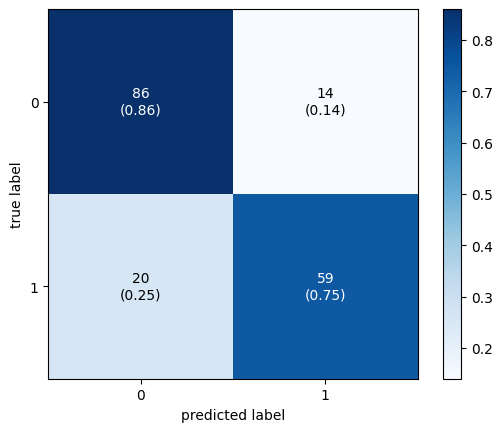

In [50]:
plot_confusion_matrix(mat,show_normed=True, colorbar=True, show_absolute=True)   
plt.show()

In [51]:
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
f1_sc=f1_score(Y_test,Y_pred)

In [52]:
print("Precision :: ",precision)
print(" Recall   :: ",recall)
print("f1_score  :: ",f1_sc)

Precision ::  0.8082191780821918
 Recall   ::  0.7468354430379747
f1_score  ::  0.7763157894736842


In [54]:
import pickle
pickle.dump(model,open('Model.pkl','wb'))